In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
stud_perf = pd.read_csv("Student_Performance.csv")

In [3]:
stud_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
stud_perf.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
stud_perf["Extracurricular Activities"] = label_encoder.fit_transform(stud_perf["Extracurricular Activities"])

stud_perf.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [6]:
stud_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int32  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 429.8 KB


In [7]:
stud_perf.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score



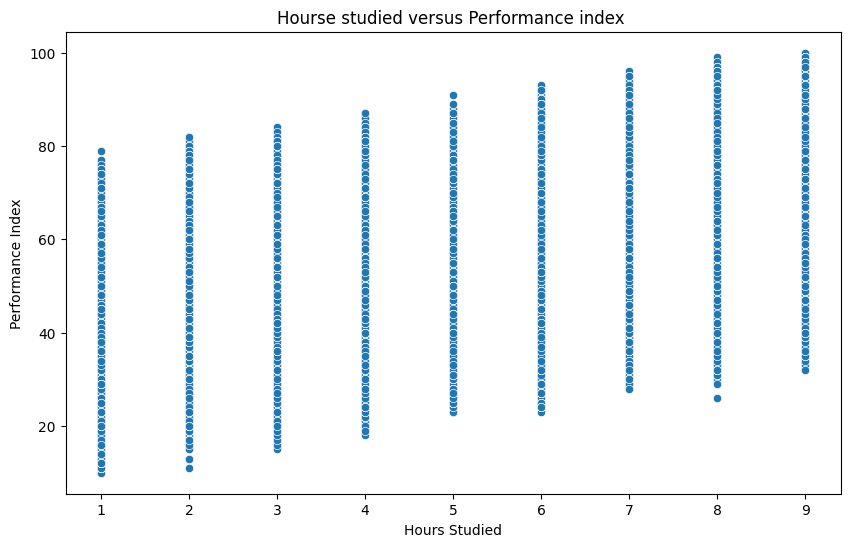

In [9]:
plt.figure(figsize= (10,6),dpi=100)

sns.scatterplot(data = stud_perf, x="Hours Studied" , y = "Performance Index" )
plt.title("Hourse studied versus Performance index ")
plt.show()

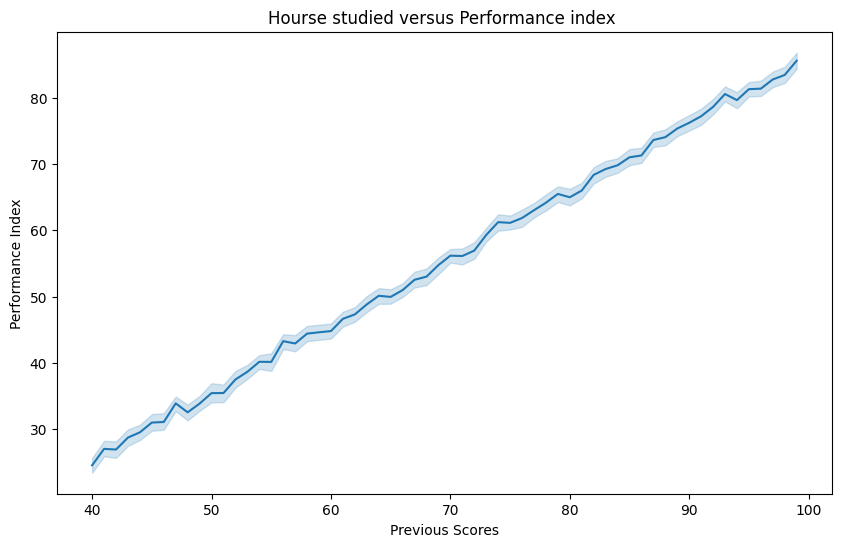

In [10]:
plt.figure(figsize= (10,6),dpi=100)
sns.lineplot(data = stud_perf, x="Previous Scores" , y = "Performance Index" )
plt.title("Hourse studied versus Performance index ")
plt.show()

In [11]:
X = stud_perf.drop ("Performance Index",axis=1)
y = stud_perf["Performance Index"]

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
min_y_test = np.min(y_test)
max_y_test = np.max(y_test)
range_y_test = max_y_test - min_y_test

print (f"Minimum value of y test : {min_y_test}")
print (f"Maximum value of y test : {max_y_test}")
print (f"Range  of y test : {range_y_test}")

Minimum value of y test : 10.0
Maximum value of y test : 100.0
Range  of y test : 90.0


In [13]:

lnrg = LinearRegression()
lnrg.fit(X_train,y_train)
y_pred = lnrg.predict(X_test)

mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred) *100
percentage_error = (mse/range_y_test) * 100
print(f"Mean squared Error :{mse} " )
print(f"R2 score :{r2:.2f}% " )
print (f"Percentage error of mse relative to range of y test : {percentage_error:.2f}%")

Mean squared Error :4.192464969807119 
R2 score :98.88% 
Percentage error of mse relative to range of y test : 4.66%


In [18]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

custom_input = [[10, 96, 1, 7, 8]]
predicted_performance = lnrg.predict(custom_input)
print("Performance of student Will be : ",predicted_performance)


Performance of student Will be :  [97.69720803]
